In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [2]:
file_path = 'data_pepe.xlsx'
data = pd.read_excel(file_path)
features = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate']
target_label = 'category'  

In [3]:
# Xử lý dữ liệu thiếu
data = data.dropna(subset=features + [target_label])
X = data[features]
y = data[target_label]

In [4]:
# Mã hóa nhãn
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Huấn luyện Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Dự đoán và đánh giá
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
                precision    recall  f1-score   support

        Normal       1.00      0.75      0.86         4
Reconnaissance       1.00      1.00      1.00       311

      accuracy                           1.00       315
     macro avg       1.00      0.88      0.93       315
  weighted avg       1.00      1.00      1.00       315



In [8]:
# Biểu đồ trực quan
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Sbytes vs Dbytes')

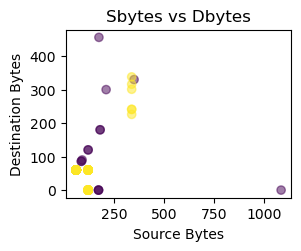

In [9]:
# 1. Biểu đồ scatter
plt.subplot(2, 2, 1)
plt.scatter(X['sbytes'], X['dbytes'], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.title('Sbytes vs Dbytes')

Text(0.5, 0, 'Importance Score')

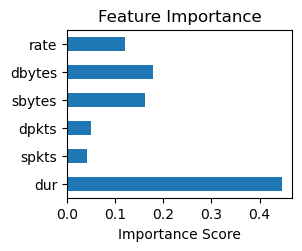

In [10]:
# 2. Tầm quan trọng đặc trưng
plt.subplot(2, 2, 2)
feat_importance = pd.Series(rf_model.feature_importances_, index=features)
feat_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance Score')

Text(50.72222222222221, 0.5, 'Actual')

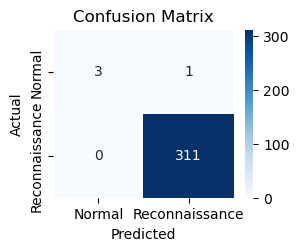

In [11]:
# 3. Ma trận nhầm lẫn
plt.subplot(2, 2, 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [12]:
# 4. Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

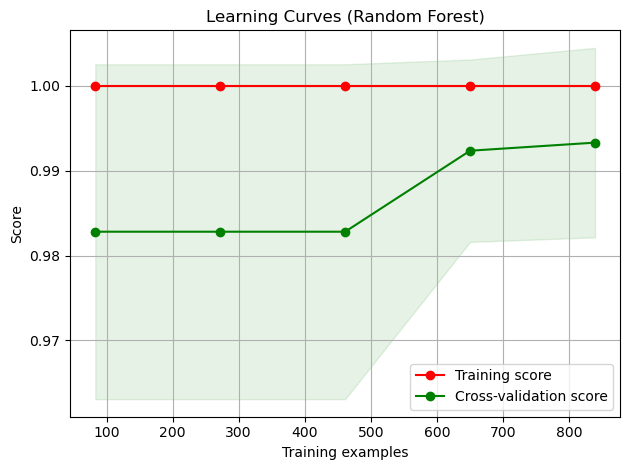

In [13]:
plot_learning_curve(rf_model, "Learning Curves (Random Forest)", X, y, cv=5)

plt.tight_layout()
plt.show()